# Convolution naïve

Jusqu'à présent, nous avons utilisé des réseaux multi-couches pleinement connectées.  Les opérations à chaque couche étaient de type *multiplication matrice-vecteur* suivies d'une non-linéarité. Dans ce deuxième travail pratique, nous aborderons un nouveau type de couche : la **couche convolutive**.  Mais avant de commencer à tester des réseaux de neurones à convolution, commençons à explorer l'opération de "convolution".

L'objectif de ce notebook est de vous amener à coder une **version naïve de la convolution**, version que vous pourrez récupérer par la suite.

Le code à rédiger concerne les fonctions **convolution_naive** et **backward_convolution_naive** dans le fichier **layers/ConvNaive.py**.


## NOTE IMPORTANTE!

Dans ce notebook, nous utiliserons la **fonction d'activation identité** selon laquelle :  $ f(x) = x $


In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Pour automatiquement recharger les modules externes
# voir http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Convolution version 1.0

On commence ici avec une opération très simple: convoluer une image de taille
## **4x4**
par un filtre de taille
## **2x2**
**Pas de padding et le stride = 1.**  Le résultat doit être de taille
## **3x3**
La fonction *convolution_naive* est dans le fichier *Conv.py*.  Puisque le tenseur de sortie doit avoir le contenu suivant :


|   |   |   |
|---|---|---|
| 5 | 6 | 5 |
| 6 | 7 | 8 |
| 8 | 8 | 9 |




In [2]:
# TODO, à vous de coder la fonction "convolution_naive"
from layers.ConvNaive import convolution_naive

x_shape = (1, 1, 4, 4)  # (N=1 batch, C=1 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (1, 1, 2, 2)  # (F=1 Nb feature maps en sortie, C=1 channels, HH=2 hauteur du filtre, WW=2 largeur du filtre)
x = np.floor(10*np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape))
w = np.floor(10*np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape))
b = np.floor(10*np.linspace(-0.1, 0.2, num=w.shape[0]))

correct_out = np.array([[[[5, 6, 5],
                            [6, 7, 8],
                            [8, 8, 9]]]])

print('Input = \n', x)
print('Filter = \n', w)
print('Bias = ', b)
conv_param = {'stride': 1, 'pad': 0}
out, _ = convolution_naive(x, w, b, conv_param, True)
print('Output = \n', out)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference: ', np.sum(np.power(out-correct_out,2).flatten()))

Input = 
 [[[[-1. -1. -1.  0.]
   [ 0.  1.  1.  1.]
   [ 2.  2.  3.  3.]
   [ 3.  4.  4.  5.]]]]
Filter = 
 [[[[-2. -1.]
   [ 1.  3.]]]]
Bias =  [-1.]
Output = 
 [[[[5. 6. 5.]
   [6. 7. 8.]
   [8. 8. 9.]]]]
difference:  0.0


# Convolution version 2.0

Opération un peu plus compliquée : convoluer une image ayant 2 canaux de taille
## **4x4x2**
par un filtre de taille
## **2x2x2**
**Pas de padding et le stride = 1.**  Le résultat doit être de taille
## **3x3**
Le tenseur de sortie doit avoir le contenu suivant :


|   |   |   |
|---|---|---|
| 19 | 21 | 20 |
| 21 | 22 | 22 |
| 21 | 22 | 23 |

In [3]:
x_shape = (1, 2, 4, 4)  # (N=1 batch, C=2 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (1, 2, 2, 2)  # (F=1 Nb feature maps en sortie, C=2 channels, HH=2 hauteur du filtre, WW=2 largeur du filtre)
x = np.floor(10*np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape))
w = np.floor(10*np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape))
b = np.floor(10*np.linspace(-0.1, 0.2, num=w.shape[0]))

correct_out = np.array([[[[19, 21, 20],
                            [21, 22, 22],
                            [21, 22, 23]]]])

print('Input = \n', x)
print('Filter = \n', w)
print('Bias = ', b)
conv_param = {'stride': 1, 'pad': 0}
out, _ = convolution_naive(x, w, b, conv_param, True)
print(out)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference: ', np.sum(np.power(out-correct_out,2).flatten()))

Input = 
 [[[[-1. -1. -1. -1.]
   [-1. -1.  0.  0.]
   [ 0.  0.  0.  1.]
   [ 1.  1.  1.  1.]]

  [[ 2.  2.  2.  2.]
   [ 2.  3.  3.  3.]
   [ 3.  3.  4.  4.]
   [ 4.  4.  4.  5.]]]]
Filter = 
 [[[[-2. -2.]
   [-1.  0.]]

  [[ 0.  1.]
   [ 2.  3.]]]]
Bias =  [-1.]
[[[[19. 21. 20.]
   [21. 22. 22.]
   [21. 22. 23.]]]]
difference:  0.0


# Convolution version 3.0

Ici on convolue une image ayant 2 canaux.  L'image est de taille
## **2x4x4**
et le filtre est de taille
## **2x4x4**
Puisque le filtre et l'image sont de même taille et que le padding = 0 et stride =1 alors résultat doit un tableau de taille
## **1x1**
Le tenseur de sortie doit avoir le contenu suivant : **86**

In [4]:
x_shape = (1, 2, 4, 4)  # (N=1 batch, C=2 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (1, 2, 4, 4)  # (F=1 Nb feature maps en sortie, C=2 channels, HH=4 hauteur du filtre, WW=4 largeur du filtre)
x = np.floor(10*np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape))
w = np.floor(10*np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape))
b = np.floor(10*np.linspace(-0.1, 0.2, num=w.shape[0]))

correct_out = np.array([[[[86]]]])

print('Input = \n', x)
print('Filter = \n', w)
print('Bias = ', b)
conv_param = {'stride': 1, 'pad': 0}
out, _ = convolution_naive(x, w, b, conv_param, True)
print(out)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference: ', np.sum(np.power(out-correct_out,2).flatten()))

Input = 
 [[[[-1. -1. -1. -1.]
   [-1. -1.  0.  0.]
   [ 0.  0.  0.  1.]
   [ 1.  1.  1.  1.]]

  [[ 2.  2.  2.  2.]
   [ 2.  3.  3.  3.]
   [ 3.  3.  4.  4.]
   [ 4.  4.  4.  5.]]]]
Filter = 
 [[[[-2. -2. -2. -2.]
   [-2. -2. -2. -1.]
   [-1. -1. -1. -1.]
   [-1.  0.  0.  0.]]

  [[ 0.  0.  0.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  2.  2.  2.]
   [ 2.  2.  2.  3.]]]]
Bias =  [-1.]
[[[[86.]]]]
difference:  0.0


# Convolution version 4.0

**ATTENTION! ici on va tester un padding et un stride différent** 

Pour ce faire, nous allons convoluer une image ayant 2 canaux.  L'image est de taille
## **2x4x4**
et le filtre est de taille
## **2x4x4**
Puisque le filtre et l'image sont de même taille et que le **padding = 1 et le stride = 2** alors résultat doit être un tableau de taille
## **2x2**
Le tenseur de sortie doit avoir le contenu suivant : 

| | |
|-|-|
|52|49|
|37|29|

In [5]:
x_shape = (1, 2, 4, 4)  # (N=1 batch, C=2 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (1, 2, 4, 4)  # (F=1 Nb feature maps en sortie, C=2 channels, HH=4 hauteur du filtre, WW=4 largeur du filtre)
x = np.floor(10*np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape))
w = np.floor(10*np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape))
b = np.floor(10*np.linspace(-0.1, 0.2, num=w.shape[0]))

correct_out = np.array([[[[52, 49],
                            [37, 29]]]])

print('Input = \n', x)
print('Filter = \n', w)
print('Bias = ', b)
conv_param = {'stride': 2, 'pad': 1}
out, _ = convolution_naive(x, w, b, conv_param, True)
print(out)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference: ', np.sum(np.power(out-correct_out,2).flatten()))

Input = 
 [[[[-1. -1. -1. -1.]
   [-1. -1.  0.  0.]
   [ 0.  0.  0.  1.]
   [ 1.  1.  1.  1.]]

  [[ 2.  2.  2.  2.]
   [ 2.  3.  3.  3.]
   [ 3.  3.  4.  4.]
   [ 4.  4.  4.  5.]]]]
Filter = 
 [[[[-2. -2. -2. -2.]
   [-2. -2. -2. -1.]
   [-1. -1. -1. -1.]
   [-1.  0.  0.  0.]]

  [[ 0.  0.  0.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  2.  2.  2.]
   [ 2.  2.  2.  3.]]]]
Bias =  [-1.]
[[[[52. 49.]
   [37. 29.]]]]
difference:  0.0


# Convolution version 5.0

Dernier test!  

Nous allons ici convoluer **une batch de deux images** ayant chacune **3 canaux**.  La batch est un tenseur de taille
## **2x3x4x4**
De plus, nous appliquerons **3 filtres**.  Le tenseur de filtre est de taille
## **3x3x4x4**
Puisque le filtre et l'image ont tous deux 4 colonnes et 4 lignes et que le **padding = 1 et le stride = 2** alors résultat être une **batch de deux éléments ayant chacun trois feature maps**.  Le tenseur de sortie doit être de taille
## **2x3x2x2**

In [6]:
x_shape = (2, 3, 4, 4)  # (N=2 batch, C=3 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (3, 3, 4, 4)  # (F=3 nb feature maps en sortie, C=3 channels, HH=4 hauteur du filtre, WW=4 largeur du filtre)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = convolution_naive(x, w, b, conv_param, True)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])
print(out)
print(out.shape)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference: ', np.sum(np.power(out-correct_out,2).flatten()))

[[[[-0.08759809 -0.10987781]
   [-0.18387192 -0.2109216 ]]

  [[ 0.21027089  0.21661097]
   [ 0.22847626  0.23004637]]

  [[ 0.50813986  0.54309974]
   [ 0.64082444  0.67101435]]]


 [[[-0.98053589 -1.03143541]
   [-1.19128892 -1.24695841]]

  [[ 0.69108355  0.66880383]
   [ 0.59480972  0.56776003]]

  [[ 2.36270298  2.36904306]
   [ 2.38090835  2.38247847]]]]
(2, 3, 2, 2)
difference:  2.0343208911379642e-16


## Sanity check

Convoluons maintenant 2 *vraies* images couleurs.  Le premier filtre est un filtre faisant la **moyenne des canaux rouge-vert-bleu**; le résultat est une image en niveau de gris.  Le 2e filtre est un filtre qui détecte les contours horizontaux rouges.

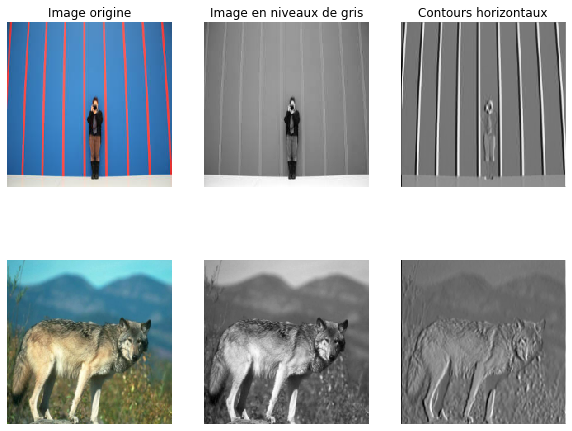

In [7]:
from matplotlib.pyplot import imread
from skimage.transform import resize

stripes = imread('datasets/stripes.jpg')
wolf = imread('datasets/wolf.jpg')

img_size = 200   # Make this smaller if it runs too slow
stripes_resized = resize(stripes, (img_size, img_size))
wolf_resized = resize(wolf, (img_size, img_size))

x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = stripes_resized.transpose((2, 0, 1))
x[1, :, :, :] = wolf_resized.transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.333, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.334, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.333, 0], [0, 0, 0]]


# Second filter detects horizontal edges in the blue channel.
w[1, 0, :, :] = [[1, 0, -1], [2, 0, -1], [1, 0, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = convolution_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_noax(stripes_resized)
plt.title('Image origine')
plt.subplot(2, 3, 2)
imshow_noax(out[0,0,:,:])
plt.title('Image en niveaux de gris')
plt.subplot(2, 3, 3)
imshow_noax(out[0,1,:,:])
plt.title('Contours horizontaux')
plt.subplot(2, 3, 4)
imshow_noax(wolf_resized)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()


# Rétro-propagation

Maintenant que la propagation avant de la convolution fonctionne, il faut coder la **rétro-propagation**


# Question :

Avant de commencer à coder, expliquez mathématiquement en quoi consiste le gradient d'une convolution par rapport aux variables x, w et b, à savoir les variables dx, dw et db dans le code.  Pour vous aider, vous pouvez vous référez au document que voici:

https://becominghuman.ai/back-propagation-in-convolutional-neural-networks-intuition-and-code-714ef1c38199

## Votre réponse : 
Notons:
- $ W $ : Tenseur de poids du filtre de taille $(F, C, FH, FW)$
- $ X $ : Tenseur d'entrée de taille $(N, C, H, W)$
- $ B $ : Vecteur de biais de taille $(F)$
- $ O $ : Tenseur convolué de taille $(N, F, H', W')$, avec $ \begin{cases}
                                                             H' = 1 + \frac{(H + 2 * pad - FH)}{stride} \\ 
                                                             W' = 1 + \frac{(W + 2 * pad - FW)}{stride} 
                                                             \end{cases}$
- $ O' $ : Tenseur des dérivés en amont (gradient de perte de la couche précédente) de taille $(N, F, H', W')$

$$ O' = \frac{\partial L}{\partial O} = (\delta_{f,i,j}) $$

Pour chaque filtre $w_{f} ∈ W$:
$$ \frac{\partial L}{\partial w_{f}} = \sum_{i}^{H'} \sum_{j}^{W'} 
        \frac{\partial L}{\partial o_{f,i,j}} 
        \frac{\partial o_{f,i,j}}{\partial w_{f}} \qquad avec : 
                \begin{cases}
                    \frac{\partial L}{\partial o_{f,i,j}} = \delta_{f,i,j} \\
                    \frac{\partial o_{f,i,j}}{\partial w_{f}} = x_{[m:m+FH,n:n:+FW]} \enspace où \enspace m = i*stride \enspace et \enspace n = j*stride
                \end{cases}
        $$ <br />

Pour chaque région $x_{[m:m+FH,n:n:+FW]} ∈ X$ (cette région comprend tous les canaux C):
$$ \frac{\partial L}{\partial x_{[m:m+FH,n:n:+FW]}} = \sum_{i}^{H'} \sum_{j}^{W'} 
        \frac{\partial L}{\partial o_{f,i,j}} 
        \frac{\partial o_{f,i,j}}{\partial x_{[m:m+FH,n:n:+FW]}} \qquad avec : 
                \begin{cases}
                    \frac{\partial L}{\partial o_{f,i,j}} = \delta_{f,i,j} \\
                    \frac{\partial o_{f,i,j}}{\partial x_{[m:m+FH,n:n:+FW]}} = w_{f}
                \end{cases}
        $$ <br />

Pour chaque élément $b_{f} ∈ B$:
$$ \frac{\partial L}{\partial b_{f}} = \sum_{i}^{H'} \sum_{j}^{W'} 
        \frac{\partial L}{\partial o_{f,i,j}}
        \frac{\partial o_{f,i,j}}{\partial b_{f}} \qquad avec : 
                \begin{cases}
                    \frac{\partial L}{\partial o_{f,i,j}} = \delta_{f,i,j} \\
                    \frac{\partial o_{f,i,j}}{\partial b_{f}} = 1
                \end{cases}
        $$ <br />

Par analogie aux variables du code, nous avons:
$ \begin{cases}
        dw = \frac{\partial L}{\partial W} \\ 
        dx = \frac{\partial L}{\partial X} \\ 
        db = \frac{\partial L}{\partial B} \\ 
        dout = \frac{\partial L}{\partial O} 
\end{cases}$

On note bien que si on a appliqué du zero-padding sur $X$ pendant le forward pass de la convolution, on doit l'enlever de $dX$ à la fin du backward pass.

In [8]:
# Commençons avec un cas facile, déjà testé auparavant : 
#    batch de 1 image 4x4 avec 1 channel, un filtre 2x2, pas de padding et un stride de 1 

from layers.ConvNaive import convolution_naive, backward_convolution_naive

x_shape = (1, 1, 4, 4)  # (N=1 batch, C=1 channels, H=4 largeur du feature map, W=4 Hauteur du feature map)
w_shape = (1, 1, 2, 2)  # (F=1 Nb feature maps en sortie, C=1 channels, HH=2 hauteur du filtre, WW=2 largeur du filtre)
x = np.floor(10*np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape))
w = np.floor(10*np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape))
b = np.floor(10*np.linspace(-0.1, 0.2, num=w.shape[0]))
dOut = np.ones((1,1,3,3))
correct_dx = np.array([[[[-2, -3, -3, -1],
                         [-1,  1,  1,  2],
                         [-1,  1,  1,  2],
                         [ 1,  4,  4,  3]]]])
correct_dw = np.array([[[[6, 9],
                          [20,24]]]])
correct_db = np.array([9])

conv_param = {'stride': 1, 'pad': 0}
out, cache = convolution_naive(x, w, b, conv_param, True)
dx, dw, db = backward_convolution_naive(dOut, cache)

# La différence entre la sortie "out" et la sortie attendue "correct_out" devrait être proche de 0
print('difference dx: ', np.sum(np.power(dx-correct_dx,2).flatten()))
print('difference dw: ', np.sum(np.power(dw-correct_dw,2).flatten()))
print('difference db: ', np.sum(np.power(db-correct_db,2).flatten()))


difference dx:  0.0
difference dw:  0.0
difference db:  0.0


In [9]:
# Allons-y maintenant avec un cas plus réaliste :
#  batch de 4 images 7x7 ayant chacune 3 channels.  Il y a 2 filtres de taille 3x3x3
# 
# Pour valider que votre convolution fonctionne bien, nous utiliserons le gradient numérique suivant 


def eval_numerical_gradient_array(f, x, df, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad


In [10]:
x = np.random.randn(4, 3, 7, 7)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 0}

out, cache = convolution_naive(x, w, b, conv_param)
dx, dw, db = backward_convolution_naive(dout, cache)

# La différence entre un gradient numérique et votre gradient devrait être inférieure à 1e-9'
dx_num = eval_numerical_gradient_array(lambda x: convolution_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: convolution_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: convolution_naive(x, w, b, conv_param)[0], b, dout)
print('difference dx: ', np.sum(np.power(dx-dx_num,2).flatten()))
print('difference dw: ', np.sum(np.power(dw-dw_num,2).flatten()))
print('difference db: ', np.sum(np.power(db-db_num,2).flatten()))

difference dx:  5.771759791022882e-18
difference dw:  4.8334732682763935e-18
difference db:  5.531580164225494e-20
